In [1]:
import pandas as pd
import requests 
from bs4 import BeautifulSoup
import seaborn as sns

C:\Users\pedro\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Intro

In [2]:
budget=300000

# Import and Describe the Dataset

In [3]:
df = pd.read_csv('fifa2019.csv',index_col=0)

In [4]:
df.head()

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [5]:
df.shape

(18207, 88)

In [6]:
df.columns

Index(['ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag', 'Overall',
       'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiv

# Data Cleaning and Transformation

## Drop columns with links and Jersey Number

In [7]:
df = df.drop(columns=['Photo','Flag','Club Logo','Jersey Number'])

## Look for missing values

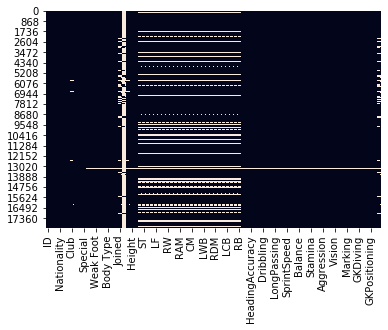

In [8]:
sns.heatmap(df.isnull(), cbar=False)

In [9]:
X = df._get_numeric_data()
X[X.isnull().any(axis=1)].head()

,ID,Age,Overall,Potential,Special,International Reputation,Weak Foot,Skill Moves,Crossing,Finishing,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
13236,177971,33,62,62,1510,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13237,195380,29,62,62,1532,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13238,139317,35,62,62,1573,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13239,240437,20,62,72,1610,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13240,209462,24,62,66,1481,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
X = X.dropna()
df = df.loc[(df['ID'].isin(X['ID'])),:]

## Working in columns with info about money

In [11]:
df[['Value','Wage','Release Clause']]

,Value,Wage,Release Clause
0,€110.5M,€565K,€226.5M
1,€77M,€405K,€127.1M
2,€118.5M,€290K,€228.1M
3,€72M,€260K,€138.6M
4,€102M,€355K,€196.4M
...,...,...,...
18202,€60K,€1K,€143K
18203,€60K,€1K,€113K
18204,€60K,€1K,€165K
18205,€60K,€1K,€143K


* Create a function

In [12]:
def convert_money(x):
    if x == 0:
        pass
    elif x[-1] == 'M':
        x=x.replace('€','').replace('M','')
        x=float(x)*1000
    elif x[-1]=='K':
        x=x.replace('€','').replace('K','')
        x=float(x)
    else:
        x=0
    return x

### Transform columns

In [13]:
df['Value']=df['Value'].fillna(0).apply(lambda x: convert_money(x))
df['Wage']=df['Wage'].fillna(0).apply(lambda x: convert_money(x))
df['Release Clause']=df['Release Clause'].fillna(0).apply(lambda x: convert_money(x))

In [14]:
df[['Value','Wage','Release Clause']]

,Value,Wage,Release Clause
0,110500.0,565.0,226500.0
1,77000.0,405.0,127100.0
2,118500.0,290.0,228100.0
3,72000.0,260.0,138600.0
4,102000.0,355.0,196400.0
...,...,...,...
18202,60.0,1.0,143.0
18203,60.0,1.0,113.0
18204,60.0,1.0,165.0
18205,60.0,1.0,143.0


## Create a measure with the mean between overall and potential

In [15]:
df['Ov_Pot'] = (df['Overall']+df['Potential'])/2

# Study Newcastle Team

## Compare Newcastle between other teams on Premier League

* <b>When we look at the overall average of the players of each team in the premiere league, we see that Newcastle is only in 11 position among the 20 teams</b>

In [16]:
teams_pm=list(pd.read_html('https://pt.wikipedia.org/wiki/Premier_League_de_2018%E2%80%9319')[5]['Equipe'])
teams_pm[-1]='Wolverhampton Wanderers'
teams_pm[-2]='West Ham United'
mask= df['Club'].isin(teams_pm)
rank_pm=df.loc[mask,:].groupby('Club')['Ov_Pot'].mean().sort_values(ascending=False)
rank_pm

Club
Manchester City            80.318182
Manchester United          79.954545
Chelsea                    79.712121
Tottenham Hotspur          79.378788
Liverpool                  79.196970
Arsenal                    78.287879
Everton                    77.265625
Leicester City             76.046875
West Ham United            75.578125
Watford                    74.758621
Southampton                74.424242
Newcastle United           74.090909
Brighton & Hove Albion     73.656250
Crystal Palace             73.281250
Wolverhampton Wanderers    73.196970
Fulham                     73.187500
Bournemouth                72.906250
Burnley                    72.575758
Huddersfield Town          72.359375
Cardiff City               70.030303
Name: Ov_Pot, dtype: float64

In [17]:
#position of Newcastle
list(rank_pm.index).index('Newcastle United')

11

In [18]:
#quantity of teams in premiere league
len(list(rank_pm.index))

20

### Create function to look position in other times

In [19]:
def rank_pm():
    mask= df['Club'].isin(teams_pm)
    rank_pm=df.loc[mask,:].groupby('Club')['Ov_Pot'].mean().sort_values(ascending=False)
    print(f'Position Newcastle: {list(rank_pm.index).index("Newcastle United")}')
    print('-='*10+'RANK'+'-='*10)
    print(rank_pm)

## Looking at the Newcastle group

### Create function

In [20]:
def view_team():
    print(df.query('Club == "Newcastle United"')[['Name','Position','Overall','Potential','Ov_Pot','Value']])
    print('-'*30)
    print(df.query('Club == "Newcastle United"')[['Position','Ov_Pot']].groupby('Position').mean().sort_values(by='Ov_Pot',ascending=True))

In [21]:
view_team()

                   Name Position  Overall  Potential  Ov_Pot    Value
768         M. Dúbravka       GK       78         80    79.0   8500.0
830        J. Lascelles      RCB       78         83    80.5  12000.0
850          F. Lejeune       CB       78         80    79.0  10000.0
884          J. Shelvey       CM       78         80    79.0  12500.0
927          M. Ritchie       RM       77         77    77.0   9000.0
970           S. Rondón       RS       77         77    77.0   9000.0
1203       F. Fernández      LCB       76         76    76.0   6000.0
1256        Ayoze Pérez       CF       76         81    78.5  10500.0
1295      Ki Sung Yueng      LCM       76         76    76.0   7500.0
1339             Kenedy       LM       76         84    80.0  11500.0
1344           C. Clark       CB       76         77    76.5   7000.0
1372            Y. Mutō       ST       76         79    77.5  10000.0
1547          D. Yedlin       RB       76         81    78.5   8500.0
1706         P. Dumm

# Go to shopping

## Functions

### Buy/SELL

In [22]:
def buy(id):
    value=float(df.loc[(df['ID'] == id),'Release Clause'])
    df.loc[(df['ID'] == id),'Club'] = 'Newcastle United'
    return value

In [23]:
def sell(id):
    value=float(df.loc[(df['ID'] == id),'Value'])
    df.loc[(df['ID'] == id),'Club'] = np.nan
    return value